# Obtaining Data from Spotify API

## Creating Access Token

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
Client_ID="a935b8cf62cb47ebabdf2ba5abda22ba"
Client_Secret="4141b14831444331a3d0cec6510628cb"

In [3]:
url_auth='https://accounts.spotify.com/api/token'

In [4]:
#requesting token
auth_request=requests.post(url_auth,{
    "grant_type": 'client_credentials',
    "client_id":Client_ID,
    "client_secret":Client_Secret,
})

In [5]:
access_token=auth_request.json()["access_token"] #extracting token
# access_token

In [6]:
header={"Authorization":"Bearer "+ access_token} #generating identification header
# header

## Requesting Artists Information

In [7]:
url_artist="https://api.spotify.com/v1/artists/{}" #url to obtain artist's information

In [8]:
artist_ids=["4q3ewBCX7sLwd24euuV69X","3q7HBObVc0L8jNeTe5Gofh"] #id of artist for testing

In [9]:
#creating function to request artist's informartion and save it in a dictionary
def artist_info(artist_ids):
    total_data=[]
        
    for i in artist_ids:
        artist_data=requests.get(url_artist.format(i),headers=header)
        artist_data=artist_data.json()    
        data_artist={"Name":artist_data["name"],
                     "Followers":artist_data["followers"]["total"],
                     "Popularity":artist_data["popularity"],
                     "Genres":artist_data["genres"]            
        }
        total_data.append(data_artist)
    
    return total_data
    

In [10]:
data=artist_info(artist_ids)
# data # checking if function works properly 

## Data analysis

### Creating The Data Set

I will compare the information of the 5 most popular artists in North America vs the 5 most popular artists in Latin America in 2021. The idea is to understand how big is the market for artists in North America compared to artist from Latin America. Also, I will look into the genres that the artists play and look if there are some similarities between them.

In [11]:
LA_artists_ids=["1vyhD5VmyZ7KMfW5gqLgo5","4q3ewBCX7sLwd24euuV69X","1i8SpTcr7yvPOmcqrbnVXY","4VMYDCV2IEDYJArk749S6m","1r4hJ1h58CWwUQe3MxPuau"]  #spotify ids from Jbalvin, Bad Bunny, Ozuna, Daddy Yankee, Maluma 
NA_artists_ids=["246dkjvS1zLTtiykXe5h60","3TVXtAsR1Inumwj472S9r4","6qqNVTkY8uBg9cP3Jd7DAH","06HL4z0CvFAxyc27GXpf02","66CXWjxzNUsdJxJ2JdwvnR"]  #spotify ids from Post Malone, Drake, Billie Eilish, Taylor Swift, Ariana Grande

In [12]:
LA_artist_info=artist_info(LA_artists_ids)
data_set_LA=pd.DataFrame(LA_artist_info)
data_set_LA["Origin"]=["Latin America","Latin America","Latin America","Latin America","Latin America"] #Adding Origin to data set

In [13]:
data_set_LA

,Name,Followers,Popularity,Genres,Origin
0,J Balvin,30957580,93,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America
1,Bad Bunny,40003664,97,"[latin, reggaeton, trap latino]",Latin America
2,Ozuna,30330376,89,"[latin, puerto rican pop, reggaeton, trap latino]",Latin America
3,Daddy Yankee,25017932,88,"[latin, latin hip hop, reggaeton, trap latino]",Latin America
4,Maluma,28377680,88,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America


In [14]:
NA_artist_info=artist_info(NA_artists_ids)
data_set_NA=pd.DataFrame(NA_artist_info)
data_set_NA["Origin"]=["North America","North America","North America","North America","North America"] #Adding Origin to data set

In [15]:
data_set_NA

,Name,Followers,Popularity,Genres,Origin
0,Post Malone,34943833,91,"[dfw rap, melodic rap, rap]",North America
1,Drake,58912968,97,"[canadian hip hop, canadian pop, hip hop, rap,...",North America
2,Billie Eilish,52778634,92,"[art pop, electropop, pop]",North America
3,Taylor Swift,45862065,100,[pop],North America
4,Ariana Grande,72136120,93,"[dance pop, pop]",North America


In [16]:
data_set_artists=data_set_LA+data_set_NA

In [17]:
data_set_artists=data_set_LA.append(data_set_NA)

In [18]:
data_set_artists

,Name,Followers,Popularity,Genres,Origin
0,J Balvin,30957580,93,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America
1,Bad Bunny,40003664,97,"[latin, reggaeton, trap latino]",Latin America
2,Ozuna,30330376,89,"[latin, puerto rican pop, reggaeton, trap latino]",Latin America
3,Daddy Yankee,25017932,88,"[latin, latin hip hop, reggaeton, trap latino]",Latin America
4,Maluma,28377680,88,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America
0,Post Malone,34943833,91,"[dfw rap, melodic rap, rap]",North America
1,Drake,58912968,97,"[canadian hip hop, canadian pop, hip hop, rap,...",North America
2,Billie Eilish,52778634,92,"[art pop, electropop, pop]",North America
3,Taylor Swift,45862065,100,[pop],North America
4,Ariana Grande,72136120,93,"[dance pop, pop]",North America


In [26]:
# data_set_artists.set_index("Name",inplace=True)
data_set_artists.reset_index(drop=True,inplace=True)

In [28]:
## Creating Number of Generes played by Artist
number_genres=[]
for i in np.arange(len(data_set_artists.Name)):
    number_genres.append(len(data_set_artists.Genres[i]))
    
data_set_artists["Number of Genres"]=number_genres

In [29]:
data_set_artists

,Name,Followers,Popularity,Genres,Origin,Number of Genres
0,J Balvin,30957580,93,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America,4
1,Bad Bunny,40003664,97,"[latin, reggaeton, trap latino]",Latin America,3
2,Ozuna,30330376,89,"[latin, puerto rican pop, reggaeton, trap latino]",Latin America,4
3,Daddy Yankee,25017932,88,"[latin, latin hip hop, reggaeton, trap latino]",Latin America,4
4,Maluma,28377680,88,"[latin, reggaeton, reggaeton colombiano, trap ...",Latin America,4
5,Post Malone,34943833,91,"[dfw rap, melodic rap, rap]",North America,3
6,Drake,58912968,97,"[canadian hip hop, canadian pop, hip hop, rap,...",North America,5
7,Billie Eilish,52778634,92,"[art pop, electropop, pop]",North America,3
8,Taylor Swift,45862065,100,[pop],North America,1
9,Ariana Grande,72136120,93,"[dance pop, pop]",North America,2


## Checking Spotify's Popularity Rating

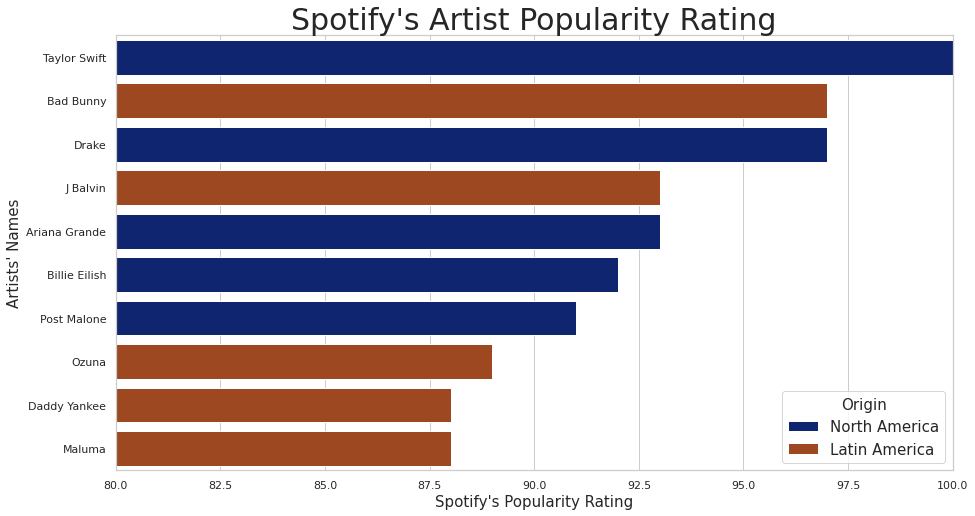

In [265]:
sns.set_theme(style="whitegrid")

plt.subplots(figsize=(15, 8)) 

data_graph=data_set_artists.sort_values("Popularity",ascending=False)

g=sns.barplot(
    data=data_graph,
    x="Popularity", y="Name", hue="Origin", 
   palette="dark",dodge=False
)

# Setting graph axis, legend and title
g.set(xlim=(80,100))
g.set_title("Spotify's Artist Popularity Rating",fontsize=30)
g.set_xlabel("Spotify's Popularity Rating",fontsize=15)
g.set_ylabel("Artists' Names",fontsize=15)
g.legend(title="Origin",title_fontsize=15,fontsize=15)

As shown in the graph the most popular artists comes from North America. However, there are two Latin American artists that have more than 90 popularity points which reflects that Latin American music is becoming well known worldwide. 

## Checking Artists' Followers

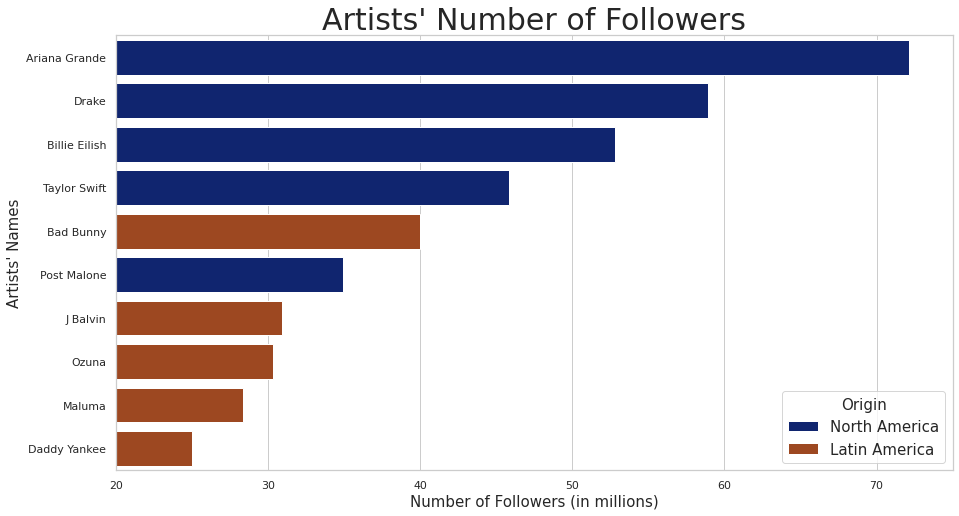

In [264]:
sns.set_theme(style="whitegrid")

plt.subplots(figsize=(15, 8)) 

data_graph=data_set_artists.sort_values("Followers",ascending=False)
data_graph["Followers"]=data_graph["Followers"]/1000000

g=sns.barplot(
    data=data_graph,
    x="Followers", y="Name", hue="Origin", 
   palette="dark",dodge=False
)

# Setting graph axis, legend and title
g.set(xlim=(20,75))
g.set_title("Artists' Number of Followers",fontsize=30)
g.set_xlabel("Number of Followers (in millions)",fontsize=15)
g.set_ylabel("Artists' Names",fontsize=15)
g.legend(title="Origin",title_fontsize=15,fontsize=15)

The previous graph shows that popularity is not directly related to the number of followers. Many would think that the number of followers will dictate the level of popularity, however, Spotify's Popularity rating depends only in the popularity of the artist's tracks as stated in Spotify's developers web page (https://developer.spotify.com/documentation/web-api/reference/#/operations/get-an-artist). 

## Checking Number of Generes Played by Artists

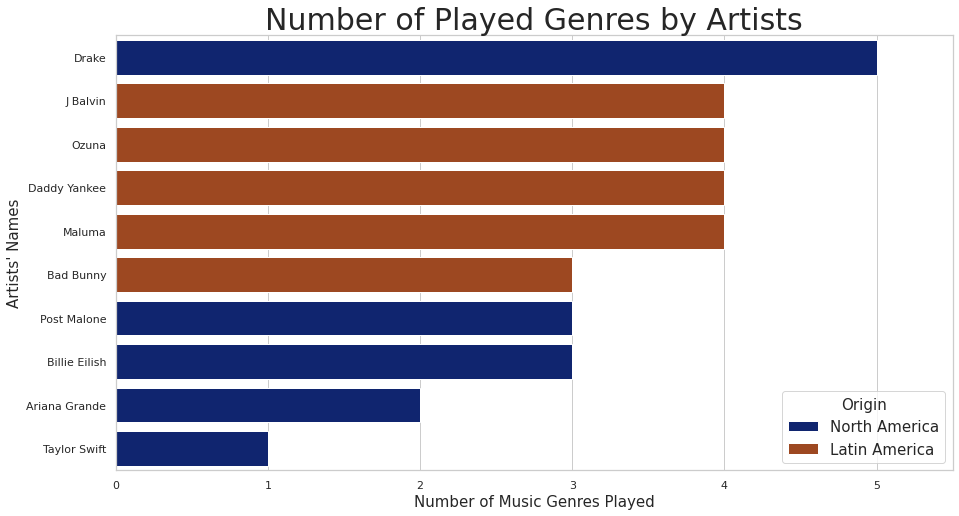

In [49]:
sns.set_theme(style="whitegrid")

plt.subplots(figsize=(15, 8)) 

data_graph=data_set_artists.sort_values("Number of Genres",ascending=False)

g=sns.barplot(
    data=data_graph,
    x="Number of Genres", y="Name", hue="Origin", 
   palette="dark",dodge=False
)

# Setting graph axis, legend and title
g.set(xlim=(0,5.5))
g.set_title("Number of Played Genres by Artists",fontsize=30)
g.set_xlabel("Number of Music Genres Played",fontsize=15)
g.set_ylabel("Artists' Names",fontsize=15)
g.legend(title="Origin",title_fontsize=15,fontsize=15)

The previous graph shows that the Latin American Artists played more genres in general. Drake shows an anomaly in the data so I will look into the genres he plays.

In [66]:
data_graph["Genres"][6]  # 6 is Drake's index

['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap']

As thought, Drake has "repetitive" genres like "canadian hip hop" and "hip hop" or "rap" and "toronto rap". In conclusion, Latin American Artist played more genres but that does not translate in more popularity. Moreover, we conclude that for being the most popular artist is not necessary to play different genres to be exceptionally good at one like Taylor Swift. 

# Conclusion

After analysing the 5 most popular singers in Latin America and North America using **Spotify's API** information I found the following conclusions:
- Singers from North America are in general more popular than singers from Latin America.
- Singers from Latin America are increasing propularity and almost becoming as popular as North American singers.
- Spotify's popularity rating is only based on popularity of artists' tracks and not followers.
- Latin American singers play more genres than North American singers. 
- Playing more genres does not impact your popularity rating in Spotify.